# Objective:

---


1. Plotting dendogram to find optimal no. of clusters
2. Use heirarchial/ agglomerative clustering approach

In [1]:
#importing necessary libraries/api
import numpy as np
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#loading dataset
iris = datasets.load_iris()

In [3]:
#making dataframe
x_pd = pd.DataFrame(iris.data, columns=iris.feature_names)
x_pd.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


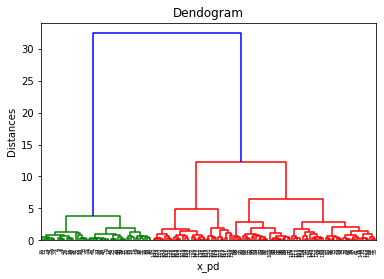

In [4]:
#plotting dendogram
dendogram = sch.dendrogram(sch.linkage(x_pd, method='ward'))
plt.title('Dendogram')
plt.xlabel('x_pd')
plt.ylabel('Distances')
plt.show()

In [5]:
#making model
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster = hc.fit_predict(x_pd)

In [6]:
#adding column to dataframe
x_pd['cluster'] = cluster
x_pd.cluster.value_counts()

1    50
2    38
0    36
3    26
Name: cluster, dtype: int64

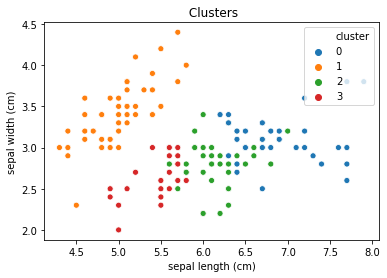

In [7]:
#plotting predicted clusters
sb.scatterplot(data=x_pd, x='sepal length (cm)', y='sepal width (cm)',  palette=sb.color_palette(n_colors=4), hue='cluster')
title = plt.title(' Clusters')
plt.show()